# Jupyter Notebook

Установка библиотек

In [ ]:
!pip install {package-name}

Получить документацию: `shift`+`tab`

In [10]:
list()

[]

Замер времени работы ячейки

In [11]:
%timeit pass

8.18 ns ± 0.242 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [4]:
%%timeit

a = 10
b = 100

a + b

46.3 ns ± 7.24 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Замер потребляемой памяти в ячейке

In [2]:
!pip install --quiet memory-profiler

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
%load_ext memory_profiler

In [6]:
%memit pass

peak memory: 96.34 MiB, increment: 0.10 MiB


In [19]:
%%memit

a = [10000 for i in range(1000000)]
b = a.copy()

peak memory: 123.20 MiB, increment: 23.27 MiB


Для работы со скриптами есть декоратор:

In [2]:
from memory_profiler import profile


@profile
def some_function(x):
    return [x for x in range(100)]


some_function(10)
pass

ERROR: Could not find file <ipython-input-2-b38d20ed1d9c>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.


Устанавливаем `nbextensions` для удобства

In [159]:
!pip install --quiet jupyter_contrib_nbextensions

In [62]:
!jupyter contrib nbextension install --user

# Numpy

In [6]:
# Установим numpy, если нужно
!pip install --quiet numpy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
import numpy as np

<b>NumPy</b> — это библиотека языка Python, добавляющая поддержку больших многомерных массивов и матриц, вместе с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами.

Мотивирующая картинка

![](https://i.ibb.co/d0sJYtC/z4GzOX6.png)

Основная единица - массив ([np.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)) (вектор, матрица, тензор, etc)

In [8]:
np.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
type(np.array([1, 2, 3]))

numpy.ndarray

### Похож на обычный список (list), но есть различия

#### Различие номер раз:

In [10]:
[1, 2, 'a', print]

[1, 2, 'a', <function print>]

In [31]:
np.array([1, 2, 'a'])

array(['1', '2', 'a'], dtype='<U21')

Т.е. все элементы массива должны быть одного типа

In [14]:
np.array([1, 2, 1]) # теперь тип всех элементов -- это инт

array([1, 2, 1])

In [32]:
np.array([1, 2, 1], dtype='float128')

array([1., 2., 1.], dtype=float128)

#### Различие номер два:

In [16]:
a = [1, 2, 3]
a.append(4)
a

[1, 2, 3, 4]

In [17]:
a = np.array([1, 2, 3])
a.append(4)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

Добавить элементов в массив можно, но:

In [18]:
a = np.append(a, 5)

In [19]:
a

array([1, 2, 3, 5])

In [20]:
a[3] = 1

In [21]:
a

array([1, 2, 3, 1])

In [ ]:
a[4] = 1

In [2]:
a = np.array([1, 2 ,3])
print(id(a))
b = a
b[2] = 10
print(id(b))
a

140436372315392
140436372315392


array([ 1,  2, 10])

Т.е. размер конкретного массива фиксируется в момент создания и "увеличить" его без создания нового объекта нельзя

#### Различие номер три

Надо быть аккуратнее с типами данных: типы в numpy немного отличаются от стандартных питоновских типов

In [22]:
a = [1, 2, 3]
a[0] += 1232234234234324353453453
a

[1232234234234324353453454, 2, 3]

In [23]:
b = np.array([1, 2, 3])
b[0] += 1232234234234324353453453

OverflowError: Python int too large to convert to C long

In [26]:
print(type(a[0]), type(b[0]))

<class 'int'> <class 'numpy.int64'>


### Как можно получить нампаевский массив:

#### Из стандартных структур питона

In [27]:
np.array([2, 3])

array([2, 3])

In [31]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

#### Также есть много стандартных генераторов

Матрица из единиц

In [32]:
np.ones(3)

array([1., 1., 1.])

In [36]:
np.ones([2, 2])

array([[1., 1.],
       [1., 1.]])

Нулевая матрица

In [37]:
np.zeros(2)

array([0., 0.])

Более гибкий аналог питоновского `range`

In [38]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
np.arange(0.5, 10.5, 1.1)

array([ 0.5,  1.6,  2.7,  3.8,  4.9,  6. ,  7.1,  8.2,  9.3, 10.4])

То же самое, но задаем не шаг, а количество элементов

In [40]:
np.linspace(10.1, 20.3, 10)

array([10.1       , 11.23333333, 12.36666667, 13.5       , 14.63333333,
       15.76666667, 16.9       , 18.03333333, 19.16666667, 20.3       ])

In [41]:
np.logspace(1, 2, 3, base=2)

array([2.        , 2.82842712, 4.        ])

In [42]:
np.logspace(-5, -10, 5)

array([1.00000000e-05, 5.62341325e-07, 3.16227766e-08, 1.77827941e-09,
       1.00000000e-10])

Единичная матрица

In [43]:
np.ones([5, 5])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [44]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Диагональная

In [45]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Все существующие генераторы можно посмотреть в [документации](https://numpy.org/doc/stable/). 

$\textbf{Важно}$: для создания numpy массивов лучше пользоваться именно встроенными генераторами везде, где это возможно, поскольку они хорошо оптимизированы и работают намного быстрее списков.

In [46]:
%%timeit

n = 1000
np.zeros(n)

1.07 µs ± 87.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [47]:
%%timeit

n = 1000
np.array([0 for _ in range(n)])

117 µs ± 7.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Индексация

Все точно так же, как и в `list`

In [48]:
a = np.array([1, 2, 3, 4])

In [49]:
a[0], a[1], a[-1]

(1, 2, 4)

In [50]:
a[1:3]

array([2, 3])

In [51]:
a = np.random.randn(3, 3)

In [52]:
a

array([[-0.84254027,  0.14155905,  0.30582608],
       [-0.95538149,  1.25344457, -1.39107999],
       [ 1.26072437, -0.70198599, -0.71379884]])

Вместо `len` используем `shape`

In [56]:
len(a)

3

In [57]:
a.shape

(3, 3)

In [58]:
a.shape[0]

3

In [59]:
a[0]

array([-0.84254027,  0.14155905,  0.30582608])

In [60]:
a

array([[-0.84254027,  0.14155905,  0.30582608],
       [-0.95538149,  1.25344457, -1.39107999],
       [ 1.26072437, -0.70198599, -0.71379884]])

Можно легко брать определенную строку или столбец матрицы

In [62]:
a[0, :]

array([-0.84254027,  0.14155905,  0.30582608])

In [63]:
a[:, 0]

array([-0.84254027, -0.95538149,  1.26072437])

In [64]:
%%timeit

a[0, 0]

172 ns ± 18.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Или так

In [65]:
%%timeit

a[0][0]

447 ns ± 141 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Важно понимать, как работает индексация:

In [37]:
a = np.random.randn(3, 4, 5, 6)
a.shape

(3, 4, 5, 6)

In [67]:
a[0][0][0].shape

(6,)

In [68]:
a[0, 0].shape

(5, 6)

In [ ]:
a[0][0].shape

In [42]:
a[:, :, :, 0].shape

(3, 4, 5)

### Математические вычисления: легко и быстро

In [71]:
import math

Попробуем сложить все элементы в списке:

In [72]:
a = [i for i in range(10)]

b = [i ** 2 for i in range(10)]

In [73]:
a + b # ???

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [74]:
for i in range(len(a)):
    a[i] += b[i]

a

[0, 2, 6, 12, 20, 30, 42, 56, 72, 90]

В numpy все проще:

In [50]:
a = np.arange(10)
b = np.arange(10) ** 2

In [76]:
a += b
a

array([ 0,  2,  6, 12, 20, 30, 42, 56, 72, 90])

In [77]:
a = np.add(a, b)

In [78]:
a = np.subtract(a, b)
a

array([ 0,  2,  6, 12, 20, 30, 42, 56, 72, 90])

In [79]:
np.sin(a)

array([ 0.        ,  0.90929743, -0.2794155 , -0.53657292,  0.91294525,
       -0.98803162, -0.91652155, -0.521551  ,  0.25382336,  0.89399666])

In [80]:
np.exp(a)

array([1.00000000e+00, 7.38905610e+00, 4.03428793e+02, 1.62754791e+05,
       4.85165195e+08, 1.06864746e+13, 1.73927494e+18, 2.09165950e+24,
       1.85867175e+31, 1.22040329e+39])

In [81]:
np.mean(a)

33.0

In [82]:
a.mean()

33.0

In [83]:
np.median(a)

25.0

Рассмотрим две операции: одинаковые ли они?

In [87]:
(a * b)

array([   0,    2,   24,  108,  320,  750, 1512, 2744, 4608, 7290])

In [88]:
a.dot(b)

17358

In [89]:
np.dot(a, b)

17358

#### Многие нампайные функции можно применять и к числам:

In [90]:
np.sin(1)

0.8414709848078965

Но лучше не надо

In [91]:
%timeit math.exp(1)

125 ns ± 26.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [92]:
%timeit np.exp(1)

993 ns ± 48.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


#### Зато векторные операции работают намного быстрее

In [93]:
def sin_of_num(x):
    return math.sin(x)

a = np.arange(1000)

In [94]:
%timeit np.sin(a)

13 µs ± 986 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [95]:
%%timeit

for i in range(a.shape[0]):
    a[i] = sin_of_num(a[i])

527 µs ± 115 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### А еще многие операции можно ускорить, сделав их векторными

In [96]:
sin_of_vector = np.vectorize(sin_of_num)
a = np.arange(1000)

In [97]:
%%timeit

sin_of_vector(a)

275 µs ± 62.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Общее правило - всегда пытайтесь избегать циклы там, где это можно сделать. Если нужно изменить все значения в массиве - используйте встроенную в numpy функцию, либо векторизуйте свою функцию. np.vectorize можно использовать и как декоратор:

In [98]:
@np.vectorize
def sin_of_num(x):
    return math.sin(x)

sin_of_num(a)

array([ 0.00000000e+00,  8.41470985e-01,  9.09297427e-01,  1.41120008e-01,
       -7.56802495e-01, -9.58924275e-01, -2.79415498e-01,  6.56986599e-01,
        9.89358247e-01,  4.12118485e-01, -5.44021111e-01, -9.99990207e-01,
       -5.36572918e-01,  4.20167037e-01,  9.90607356e-01,  6.50287840e-01,
       -2.87903317e-01, -9.61397492e-01, -7.50987247e-01,  1.49877210e-01,
        9.12945251e-01,  8.36655639e-01, -8.85130929e-03, -8.46220404e-01,
       -9.05578362e-01, -1.32351750e-01,  7.62558450e-01,  9.56375928e-01,
        2.70905788e-01, -6.63633884e-01, -9.88031624e-01, -4.04037645e-01,
        5.51426681e-01,  9.99911860e-01,  5.29082686e-01, -4.28182669e-01,
       -9.91778853e-01, -6.43538133e-01,  2.96368579e-01,  9.63795386e-01,
        7.45113160e-01, -1.58622669e-01, -9.16521548e-01, -8.31774743e-01,
        1.77019251e-02,  8.50903525e-01,  9.01788348e-01,  1.23573123e-01,
       -7.68254661e-01, -9.53752653e-01, -2.62374854e-01,  6.70229176e-01,
        9.86627592e-01,  

### Попробуем ускориться еще сильнее?

Если хочется ускорить свои функции еще сильнее, то можно использовать библиотеку [numba](https://habr.com/ru/post/484136/) и повысить производительность numpy до уровня C.

In [63]:
!pip install --quiet numba

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [66]:
import numba as nb

Основной объект, который нас интересует - это декоратор `nb.njit`. Можно просто обернуть функцию в этот декоратор и радоваться повышенной производительности:

In [101]:
@nb.njit()
def numba_mean(x):
    return np.std(x)


def numpy_mean(x):
    return np.std(x)


a = np.random.randint(0, 1000, 1000)

In [102]:
%timeit numpy_mean(a)

36 µs ± 7.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [103]:
%timeit numba_mean(a)

The slowest run took 8.45 times longer than the fastest. This could mean that an intermediate result is being cached.
6.23 µs ± 7.62 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Но на `numba` нужно писать очень аккуратно: очень много функций не поддерживается, многие встроенные возможности питона не поддерживаются и порой код писать очень трудно, поэтому читаем [документацию](http://numba.pydata.org/numba-doc/latest/reference/pysupported.html)

In [104]:
@nb.njit()
def this_doesnt_work(x):
    return {i: j for i, j in enumerate(range(5, 10))}

this_doesnt_work(np.array([1, 2]))

UnsupportedError: Failed in nopython mode pipeline (step: inline calls to locally defined closures)
[1mUse of unsupported opcode (MAP_ADD) found
[1m
File "<ipython-input-104-86feaf911884>", line 3:[0m
[1mdef this_doesnt_work(x):
[1m    return {i: j for i, j in enumerate(range(5, 10))}
[0m    [1m^[0m[0m
[0m

Внутри функций с декоратором нельзя использовать функции без декоратора:

In [105]:
def not_numba_func(x):
    return np.mean(x)


@nb.njit()
def numba_func(x):
    res = not_numba_func(x)
    return res

numba_func(np.arange(5))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'not_numba_func':[0m [1m[1mcannot determine Numba type of <class 'function'>[0m
[1m
File "<ipython-input-105-0892e315fad6>", line 6:[0m
[1mdef numba_func(x):
[1m    res = not_numba_func(x)
[0m    [1m^[0m[0m
[0m

А наоборот - можно

In [106]:
@nb.njit()
def numba_func(x):
    return np.mean(x)

def not_numba_func(x):
    return numba_mean(x)

not_numba_func(np.arange(5))

1.4142135623730951

### В случае многомерных данных:

In [107]:
a = np.random.randint(0, 10, size=(5, 3))

In [108]:
a

array([[1, 0, 8],
       [5, 2, 1],
       [4, 7, 2],
       [9, 2, 0],
       [1, 8, 5]])

In [109]:
a.sum(), np.sum(a)

(55, 55)

In [110]:
a.sum(axis=0), np.sum(a, axis=0), a.mean(axis=0)

(array([20, 19, 16]), array([20, 19, 16]), array([4. , 3.8, 3.2]))

In [111]:
a.sum(axis=1), np.sum(a, axis=1)

(array([ 9,  8, 13, 11, 14]), array([ 9,  8, 13, 11, 14]))

In [112]:
a = np.random.randint(0, 10, size=(2, 3, 2, 3))

In [113]:
a.sum(axis=(0, 1))

array([[30, 32, 28],
       [20, 29, 23]])

Отрицательные числа тоже можно использовать

In [114]:
a.sum(axis=(-1, -2, 0))

array([56, 61, 45])

### Можно менять форму массивов

In [115]:
a = np.random.randint(0, 10, (4, 3))
a

array([[0, 8, 4],
       [9, 7, 9],
       [1, 2, 4],
       [5, 2, 4]])

In [116]:
a.shape

(4, 3)

In [117]:
a.reshape((3, 4))

array([[0, 8, 4, 9],
       [7, 9, 1, 2],
       [4, 5, 2, 4]])

In [123]:
a.reshape(12)

array([0, 8, 4, 9, 7, 9, 1, 2, 4, 5, 2, 4])

In [120]:
a.flatten()

array([0, 8, 4, 9, 7, 9, 1, 2, 4, 5, 2, 4])

### Еще можно удобно менять размерность

In [124]:
a = np.arange(5)
a.shape

(5,)

In [125]:
a = np.expand_dims(a, axis=0)
a.shape

(1, 5)

In [126]:
a = np.expand_dims(a, axis=2)
a.shape

(1, 5, 1)

In [127]:
a = np.squeeze(a)
a.shape

(5,)

### Перемножать и обращать матрицы тоже можно

In [71]:
a = np.random.randn(3, 4)
b = np.random.randn(4, 5)

In [129]:
a.dot(b)

array([[ 0.55923057,  1.68040601,  1.46437127, -1.78846256,  1.10483035],
       [ 0.61186924, -1.15135594,  0.17570239, -1.08605582, -1.11701208],
       [-1.19943274,  0.02530379,  1.2200113 ,  0.69070436, -2.35415504]])

In [130]:
a.dot(b).shape

(3, 5)

In [ ]:
(a @ b).shape

In [20]:
a = np.random.randn(4, 4)

### При помощи модуля linalg можно делать крутые операции над матрицами

In [21]:
np.linalg.inv(a)

array([[-0.64025804, -0.77151519,  0.05170725, -0.67528748],
       [ 0.4683908 ,  0.29496768,  0.14300946, -0.15933017],
       [ 0.64860623,  0.76591242,  0.5967959 ,  0.81552203],
       [-0.80552146,  0.39129172, -0.19395261, -0.44185425]])

In [22]:
np.linalg.inv(a).dot(a)

array([[ 1.00000000e+00, -9.96377823e-17,  1.22156789e-16,
         7.91828258e-17],
       [-5.93026799e-17,  1.00000000e+00, -1.32879727e-16,
        -1.07599333e-16],
       [-1.28371613e-16,  1.82976237e-16,  1.00000000e+00,
        -1.51006405e-16],
       [-4.72781133e-17, -6.56943542e-17, -4.18615339e-18,
         1.00000000e+00]])

In [78]:
np.allclose(np.linalg.inv(a).dot(a), np.eye(len(a)))

True

In [24]:
np.linalg.inv(a).dot(a) == np.eye(len(a))

array([[False, False, False, False],
       [False,  True, False, False],
       [False, False, False, False],
       [False, False, False,  True]])

Стоит быть аккуратным, если приходится производить много "тяжелых" матричных операций. Таких как перемножение или обращение. Всё дело в том, что нампай под капотом - это C и Fortran. И эти две либы могут начать параллелиться на все ядра. Из-за этого проц может забиться. Выход - запуск скриптов с переменной окружения `OMP_NUM_THREADS=1`

### Можно даже находить разложения матриц

In [138]:
a = np.random.randint(0, 10, size=(4, 4))

q, r = np.linalg.qr(a)

In [139]:
q

array([[-0.41208169,  0.43934103, -0.70373433, -0.37673086],
       [-0.82416338, -0.49102821,  0.24807901, -0.13454674],
       [-0.27472113,  0.06460897, -0.2885817 ,  0.9149178 ],
       [-0.27472113,  0.7494641 ,  0.59994617,  0.05381869]])

In [140]:
r

array([[ -7.28010989, -13.18661414,  -6.18122538,  -8.79107609],
       [  0.        ,   5.84065129,   4.53555001,  -0.67193333],
       [  0.        ,   0.        ,  -3.49588886,   3.23008993],
       [  0.        ,   0.        ,   0.        ,   2.7985721 ]])

### Или решать системы уравнений

In [141]:
A = np.eye(3) * 2
b = np.random.randint(0, 10, size=(3, 1))

x = np.linalg.solve(A, b)
x

array([[4.5],
       [3. ],
       [2. ]])

In [142]:
np.allclose(x, b/2)

True

### Считать определитель или число обусловленности

In [143]:
np.linalg.det(A)

7.999999999999998

In [144]:
np.linalg.cond(A)

1.0

### И транспонировать тоже можно

In [145]:
a = np.random.randint(0, 10, size=(3, 4))
a

array([[6, 5, 0, 8],
       [5, 5, 3, 5],
       [6, 0, 1, 9]])

In [146]:
np.transpose(a)

array([[6, 5, 6],
       [5, 5, 0],
       [0, 3, 1],
       [8, 5, 9]])

Или можно вот так

In [147]:
a.T

array([[6, 5, 6],
       [5, 5, 0],
       [0, 3, 1],
       [8, 5, 9]])

### А что, если матрицы разной формы:
[broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [148]:
a = np.array([1, 2, 3])
b = np.array([2, 2, 2])

In [149]:
a * b

array([2, 4, 6])

In [150]:
a * 2

array([2, 4, 6])

In [151]:
a + 2

array([3, 4, 5])

In [152]:
a * np.array([1])

array([1, 2, 3])

In [153]:
a * np.array([1, 2])

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Со скалярами разобрались. они будут прибавляться(умножаться, вычитаться, делиться) к каждому элементу матрицы.

Если матрицы одинаковые, то все операции тоже будут применяться поэлементно

In [79]:
a = np.random.randint(0, 10, (3, 4))
a

array([[1, 9, 7, 1],
       [8, 0, 8, 7],
       [2, 0, 1, 6]])

In [80]:
b = np.ones(4) * 100
b

array([100., 100., 100., 100.])

In [156]:
a + b

array([[105., 105., 101., 109.],
       [109., 109., 107., 102.],
       [101., 101., 105., 100.]])

К каждой строчке матрицы прибавился вектор *b*

Как быть, если хотим прибавить к каждому столбцу вектор *c*?

In [81]:
c = np.array([1, 2, 3])

In [82]:
a.shape

(3, 4)

In [83]:
c.shape

(3,)

In [85]:
a

array([[1, 9, 7, 1],
       [8, 0, 8, 7],
       [2, 0, 1, 6]])

In [84]:
a + c

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [162]:
c[np.newaxis, ].shape

(1, 3)

Можно вот так, как говорили раньше

In [163]:
np.expand_dims(c, axis=0).shape

(1, 3)

In [164]:
c[:, np.newaxis].shape

(3, 1)

In [87]:
c[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [166]:
np.newaxis is None

True

In [167]:
a + c[:, np.newaxis]

array([[ 6,  6,  2, 10],
       [11, 11,  9,  4],
       [ 4,  4,  8,  3]])

### Про конкатенацию

In [168]:
a = np.random.randint(0, 10, (5, 3))
b = np.random.randint(0, 10, (11, 3))

np.concatenate((a, b), axis=0).shape

(16, 3)

In [169]:
a = np.random.randint(0, 10, (5, 3))
b = np.random.randint(0, 10, (5, 11))

np.concatenate((a, b), axis=1).shape

(5, 14)

# [Pandas](https://pythonspot.com/category/pandas/)

**pandas** — программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня. Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами. Название библиотеки происходит от эконометрического термина «панельные данные», используемого для описания многомерных структурированных наборов информации. pandas распространяется под новой лицензией BSD.

In [64]:
!pip install --quiet pandas

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [96]:
import pandas as pd

Основной объект в pandas - это DataFrame, состоящий из набора столбцов - Series.

In [97]:
df = pd.read_csv('iris.csv')

In [28]:
df

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

In [29]:
type(df)

pandas.core.frame.DataFrame

In [30]:
type(df['variety'])

pandas.core.series.Series

In [31]:
df['variety']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

### Индексация:

In [32]:
df[0]

KeyError: 0

In [33]:
df.iloc[0]

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [34]:
df['sepal.length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

In [35]:
df[['sepal.length', 'sepal.width']]

sepal.length  sepal.width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]

In [36]:
df.iloc[0]['sepal.length']

5.1

Можно еще вот так

In [37]:
df.loc[0, 'sepal.length']

5.1

In [38]:
df[10:20]

sepal.length  sepal.width  petal.length  petal.width variety
10           5.4          3.7           1.5          0.2  Setosa
11           4.8          3.4           1.6          0.2  Setosa
12           4.8          3.0           1.4          0.1  Setosa
13           4.3          3.0           1.1          0.1  Setosa
14           5.8          4.0           1.2          0.2  Setosa
15           5.7          4.4           1.5          0.4  Setosa
16           5.4          3.9           1.3          0.4  Setosa
17           5.1          3.5           1.4          0.3  Setosa
18           5.7          3.8           1.7          0.3  Setosa
19           5.1          3.8           1.5          0.3  Setosa

Вывести первые n строк можно при помощи метода head:

In [39]:
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

### Так же можем применять все векторные функции:

In [40]:
np.sin(df['sepal.length'])

0     -0.925815
1     -0.982453
2     -0.999923
3     -0.993691
4     -0.958924
         ...   
145    0.404850
146    0.016814
147    0.215120
148   -0.083089
149   -0.373877
Name: sepal.length, Length: 150, dtype: float64

Иногда бывает полезно использовать метод `to_numpy`, который превращает DataFrame в ndarray:

In [188]:
%timeit np.sin(df['sepal.length'])

92.4 µs ± 8.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [189]:
%timeit np.sin(df['sepal.length'].to_numpy())

7.78 µs ± 999 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [190]:
np.sin(df['sepal.length'].to_numpy())[:10]

array([-0.92581468, -0.98245261, -0.99992326, -0.993691  , -0.95892427,
       -0.77276449, -0.993691  , -0.95892427, -0.95160207, -0.98245261])

In [191]:
%timeit pd.Series(np.sin(df['sepal.length'].to_numpy()))

63.2 µs ± 6.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Основной метод для преобразования столбцов - это apply

In [192]:
df['sepal.length'].apply(
    lambda x: np.sin(x) ** 2 + np.cos(x) ** 2
)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: sepal.length, Length: 150, dtype: float64

Применять его нужно осторожно: работает он очень медленно, поэтому всегда по возможности лучше использовать векторные функции (также не забываем про скорость работы numpy функций при использовании его не на векторах):

In [42]:
%%timeit

df['sepal.length'].apply(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)

570 µs ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
%%timeit

vectorized_func = np.vectorize(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)
vectorized_func(df['sepal.length'])

493 µs ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [50]:
%%timeit

vectorized_func = np.vectorize(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)
vectorized_func(df['sepal.length'].to_numpy())

480 µs ± 144 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
vectorized_func = nb.vectorize(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)

In [52]:
%%timeit

vectorized_func(df['sepal.length'].to_numpy())

8.3 µs ± 1.05 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Можно использовать и классические для sql возможности

In [197]:
df.groupby('variety').agg(['mean', 'median'])

sepal.length        sepal.width        petal.length         \
                   mean median        mean median         mean median   
variety                                                                 
Setosa            5.006    5.0       3.428    3.4        1.462   1.50   
Versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal.width         
                  mean median  
variety                        
Setosa           0.246    0.2  
Versicolor       1.326    1.3  
Virginica        2.026    2.0

In [198]:
df.sort_values(['sepal.length', 'sepal.width'], ascending=True)

sepal.length  sepal.width  petal.length  petal.width    variety
13            4.3          3.0           1.1          0.1     Setosa
8             4.4          2.9           1.4          0.2     Setosa
38            4.4          3.0           1.3          0.2     Setosa
42            4.4          3.2           1.3          0.2     Setosa
41            4.5          2.3           1.3          0.3     Setosa
..            ...          ...           ...          ...        ...
118           7.7          2.6           6.9          2.3  Virginica
122           7.7          2.8           6.7          2.0  Virginica
135           7.7          3.0           6.1          2.3  Virginica
117           7.7          3.8           6.7          2.2  Virginica
131           7.9          3.8           6.4          2.0  Virginica

[150 rows x 5 columns]

После подобных преобразований в таблице меняется индекс: он перестает быть отсортированным. Можно делать так:

In [199]:
df.sort_values(['sepal.length', 'sepal.width']).reset_index(drop=True)

sepal.length  sepal.width  petal.length  petal.width    variety
0             4.3          3.0           1.1          0.1     Setosa
1             4.4          2.9           1.4          0.2     Setosa
2             4.4          3.0           1.3          0.2     Setosa
3             4.4          3.2           1.3          0.2     Setosa
4             4.5          2.3           1.3          0.3     Setosa
..            ...          ...           ...          ...        ...
145           7.7          2.6           6.9          2.3  Virginica
146           7.7          2.8           6.7          2.0  Virginica
147           7.7          3.0           6.1          2.3  Virginica
148           7.7          3.8           6.7          2.2  Virginica
149           7.9          3.8           6.4          2.0  Virginica

[150 rows x 5 columns]

In [200]:
df.drop_duplicates(['variety'], keep='first')

sepal.length  sepal.width  petal.length  petal.width     variety
0             5.1          3.5           1.4          0.2      Setosa
50            7.0          3.2           4.7          1.4  Versicolor
100           6.3          3.3           6.0          2.5   Virginica

In [201]:
df.rolling(window=10)['sepal.length'].mean()

Rolling [window=10,center=False,axis=0]

In [ ]:
df.rolling(window=10)['sepal.length'].mean().dropna()

### Можно создавать новые столбцы

In [202]:
df['is_setosa'] = df['variety'].apply(lambda x: True if x == 'Setosa' else False)
df

sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
2             4.7          3.2           1.3          0.2     Setosa   
3             4.6          3.1           1.5          0.2     Setosa   
4             5.0          3.6           1.4          0.2     Setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   
148           6.2          3.4           5.4          2.3  Virginica   
149           5.9          3.0           5.1          1.8  Virginica   

     is_setosa  
0         True  
1         True  
2         True  
3         True  
4         True  
..         ...  
145      False  
146      False  
147      False  
148      False  
149      False  

[150 rows x 6 columns]

### Или преобразовывать имеющиеся

In [203]:
df['is_setosa'] = [False if x else True for x in df['is_setosa']]
df

sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
2             4.7          3.2           1.3          0.2     Setosa   
3             4.6          3.1           1.5          0.2     Setosa   
4             5.0          3.6           1.4          0.2     Setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   
148           6.2          3.4           5.4          2.3  Virginica   
149           5.9          3.0           5.1          1.8  Virginica   

     is_setosa  
0        False  
1        False  
2        False  
3        False  
4        False  
..         ...  
145       True  
146       True  
147       True  
148       True  
149       True  

[150 rows x 6 columns]

Списки и векторы numpy автоматически преобразуются к типу pd.Series в таких случаях

### Правильно итерируемся по таблице (но лучше так вообще не делаем)

In [204]:
%%timeit

for i in range(len(df)):
    df.iloc[i]

14.9 ms ± 2.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [205]:
%%timeit

for row in df.iterrows():
    row

10.2 ms ± 851 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [206]:
for row in df.iterrows():
    break
row

(0,
 sepal.length       5.1
 sepal.width        3.5
 petal.length       1.4
 petal.width        0.2
 variety         Setosa
 is_setosa        False
 Name: 0, dtype: object)

In [207]:
row[1]['is_setosa']

False

In [214]:
%%timeit

for tup in df.itertuples():
    tup

711 µs ± 88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [215]:
for tup in df.itertuples():
    break
tup

Pandas(Index=0, _1=5.1, _2=3.5, _3=1.4, _4=0.2, variety='Setosa', is_setosa=False)

### Ускоряем Pandas!

#### Pandarallel: способ распараллелить apply

In [60]:
!pip install --quiet pandarallel

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [72]:
from pandarallel import pandarallel

pandarallel.initialize(nb_workers=2, progress_bar=True)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [74]:
df['sepal.length'].parallel_apply(lambda x: np.sin(x) ** 2 + np.cos(x) ** 2)
pass

In [81]:
func = lambda x: np.sin(x) ** 2 + np.cos(x) ** 2

df.groupby('variety').parallel_apply(
    lambda x: func(x['sepal.length'])
)

variety       
Setosa     0      1.0
           1      1.0
           2      1.0
           3      1.0
           4      1.0
                 ... 
Virginica  145    1.0
           146    1.0
           147    1.0
           148    1.0
           149    1.0
Name: sepal.length, Length: 150, dtype: float64

#### Polars: тот же pandas, но написанный на Rust

In [83]:
!pip install -q polars

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [87]:
!pip install -q pyarrow

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


Синтаксис практически такой же, как у pandas, но работает намного быстрее. Можно быстро переводить в `pd.DataFrame` и обратно

In [95]:
import polars as pl

In [109]:
data = pl.read_csv('iris.csv')
data = data.to_pandas()
data = pl.DataFrame(data)
data.head()

shape: (5, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬─────────┐
│ sepal.length ┆ sepal.width ┆ petal.length ┆ petal.width ┆ variety │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---     │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str     │
╞══════════════╪═════════════╪══════════════╪═════════════╪═════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ Setosa  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ 4.9          ┆ 3.0         ┆ 1.4          ┆ 0.2         ┆ Setosa  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ 4.7          ┆ 3.2         ┆ 1.3          ┆ 0.2         ┆ Setosa  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ 4.6          ┆ 3.1         ┆ 1.5          ┆ 0.2         ┆ Setosa  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ 5.0          ┆ 3.6         ┆ 1.4          ┆ 0.2         ┆ Setosa  │
└──────────────┴─────────────┴──────────────┴─────────────┴─────────┘

In [134]:
print(data.head())

shape: (5, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬─────────┐
│ sepal.length ┆ sepal.width ┆ petal.length ┆ petal.width ┆ variety │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---     │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str     │
╞══════════════╪═════════════╪══════════════╪═════════════╪═════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ Setosa  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ 4.9          ┆ 3.0         ┆ 1.4          ┆ 0.2         ┆ Setosa  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ 4.7          ┆ 3.2         ┆ 1.3          ┆ 0.2         ┆ Setosa  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ 4.6          ┆ 3.1         ┆ 1.5          ┆ 0.2         ┆ Setosa  │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┤
│ 5.0          ┆ 3.6         ┆ 1.4          ┆ 0.2         ┆ Setosa  │
└─────

Особенно заметна разница в скорости чтения

In [120]:
%%timeit

pd.read_csv('iris.csv')

1.3 ms ± 66.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [121]:
%%timeit

pl.read_csv('iris.csv')

269 µs ± 59.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Есть и знакомые функции

In [124]:
data['sepal.length'].apply(func)
pass

Что-то работает немного иначе 

In [133]:
for group in data.groupby(['variety']):
    print(group.head())

shape: (5, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬───────────┐
│ sepal.length ┆ sepal.width ┆ petal.length ┆ petal.width ┆ variety   │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---       │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str       │
╞══════════════╪═════════════╪══════════════╪═════════════╪═══════════╡
│ 6.3          ┆ 3.3         ┆ 6.0          ┆ 2.5         ┆ Virginica │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 5.8          ┆ 2.7         ┆ 5.1          ┆ 1.9         ┆ Virginica │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 7.1          ┆ 3.0         ┆ 5.9          ┆ 2.1         ┆ Virginica │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 6.3          ┆ 2.9         ┆ 5.6          ┆ 1.8         ┆ Virginica │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌┤
│ 6.5          ┆ 3.0         ┆ 5.8          ┆ 2.2 

А что-то - не работает совсем

In [125]:
data.variety

AttributeError: 'DataFrame' object has no attribute 'variety'

In [126]:
data.iterrows()

AttributeError: 'DataFrame' object has no attribute 'iterrows'

In [128]:
data.rows()[:10]

[(5.1, 3.5, 1.4, 0.2, 'Setosa'),
 (4.9, 3.0, 1.4, 0.2, 'Setosa'),
 (4.7, 3.2, 1.3, 0.2, 'Setosa'),
 (4.6, 3.1, 1.5, 0.2, 'Setosa'),
 (5.0, 3.6, 1.4, 0.2, 'Setosa'),
 (5.4, 3.9, 1.7, 0.4, 'Setosa'),
 (4.6, 3.4, 1.4, 0.3, 'Setosa'),
 (5.0, 3.4, 1.5, 0.2, 'Setosa'),
 (4.4, 2.9, 1.4, 0.2, 'Setosa'),
 (4.9, 3.1, 1.5, 0.1, 'Setosa')]

#### CSV - не самый удачный формат данных

In [136]:
!pip install -q tables

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


Помимо csv, есть очень много других форматов, таких как `h5` и `parquet`. Эти форматы не так удобно смотреть глазами, зато они намного лучше жмутся, быстрее читаются и сохраняются (в некоторых случаях, разница может быть в сотни и тысячи раз!)

In [150]:
big_df = pd.concat([df for _ in range(300)])

big_df.to_csv('iris.tmp.csv', index=False)
big_df.to_parquet('iris.parquet', index=False)
big_df.to_hdf('iris.h5', key='iris', index=True)

In [151]:
%%timeit

pd.read_csv('iris.tmp.csv')

21.3 ms ± 4.36 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [152]:
%%timeit

pd.read_parquet('iris.parquet')

4.99 ms ± 638 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [153]:
%%timeit

pd.read_hdf('iris.h5', key='iris')

10.9 ms ± 334 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [156]:
import os 


print(f'csv:     {os.path.getsize("iris.tmp.csv")}')
print(f'parquet: {os.path.getsize("iris.parquet")}')
print(f'h5:      {os.path.getsize("iris.h5")}')

csv:     1140058
parquet: 12404
h5:      3143528


# [Matplotlib](https://matplotlib.org)

In [66]:
!pip install --quiet matplotlib

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [90]:
import matplotlib.pyplot as plt

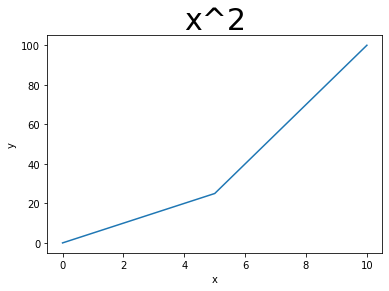

In [92]:
x = np.arange(0, 10)
y = x ** 2

plt.title('x^2', fontsize=30)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

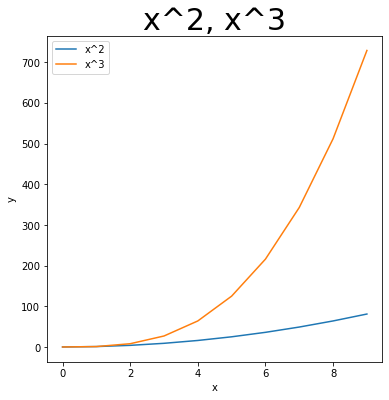

In [93]:
plt.figure(figsize=(6, 6))
x = np.arange(0, 10)
y = x ** 2
z = x ** 3
plt.title('x^2, x^3', fontsize=30)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='x^2')
plt.plot(x, z, label='x^3')
plt.legend()
plt.show()

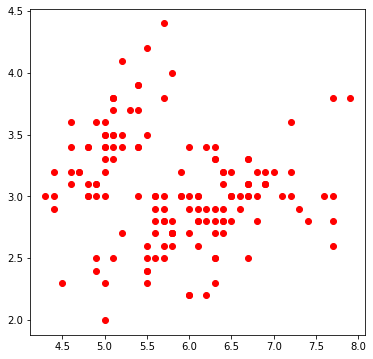

In [234]:
plt.figure(figsize=(6, 6))
plt.xlabel('length')
plt.ylabel('width')
plt.scatter(df['sepal.length'], df['sepal.width'], color='red')
plt.show()

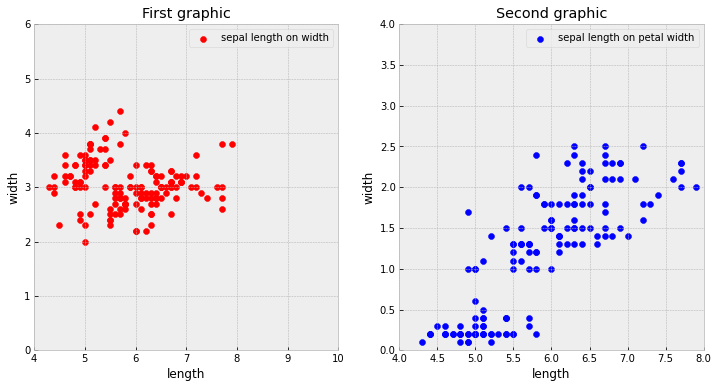

In [98]:
plt.style.use('bmh')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('First graphic')
plt.xlabel('length')
plt.ylabel('width')
plt.scatter(df['sepal.length'], df['sepal.width'], color='red', label='sepal length on width')
plt.xlim(4, 10)
plt.ylim(0, 6)
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Second graphic')
plt.xlabel('length')
plt.ylabel('width')
plt.scatter(df['sepal.length'], df['petal.width'], color='blue', label='sepal length on petal width')
plt.xlim(4, 8)
plt.ylim(0, 4)
plt.legend()

plt.show()

# Seaborn

Те же графики, только немного красивее, больше возможностей и больше автоматизации

In [65]:
!pip install --quiet seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [240]:
import seaborn as sns

Используем вместе с matplotlib

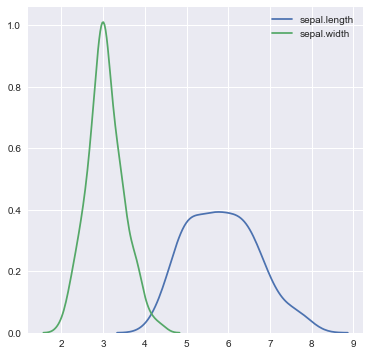

In [241]:
plt.style.use('seaborn')

plt.figure(figsize=(6, 6))
sns.kdeplot(df['sepal.length'])
sns.kdeplot(df['sepal.width'])
plt.show()

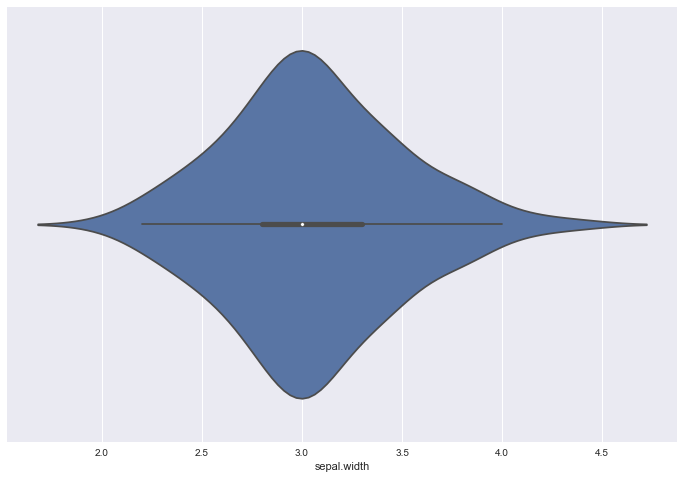

In [242]:
plt.figure(figsize=(12, 8))
sns.violinplot(df['sepal.width'])
plt.show()

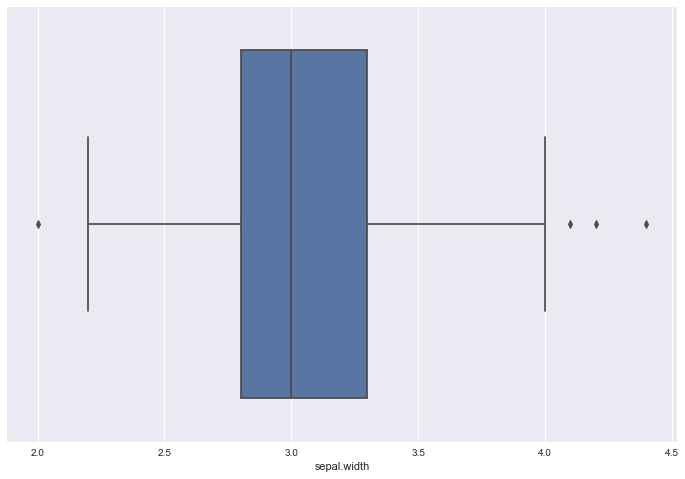

In [243]:
plt.figure(figsize=(12, 8))
sns.boxplot(df['sepal.width'])
plt.show()

In [244]:
df.corr()

sepal.length  sepal.width  petal.length  petal.width  is_setosa
sepal.length      1.000000    -0.117570      0.871754     0.817941   0.717416
sepal.width      -0.117570     1.000000     -0.428440    -0.366126  -0.603348
petal.length      0.871754    -0.428440      1.000000     0.962865   0.922765
petal.width       0.817941    -0.366126      0.962865     1.000000   0.887344
is_setosa         0.717416    -0.603348      0.922765     0.887344   1.000000

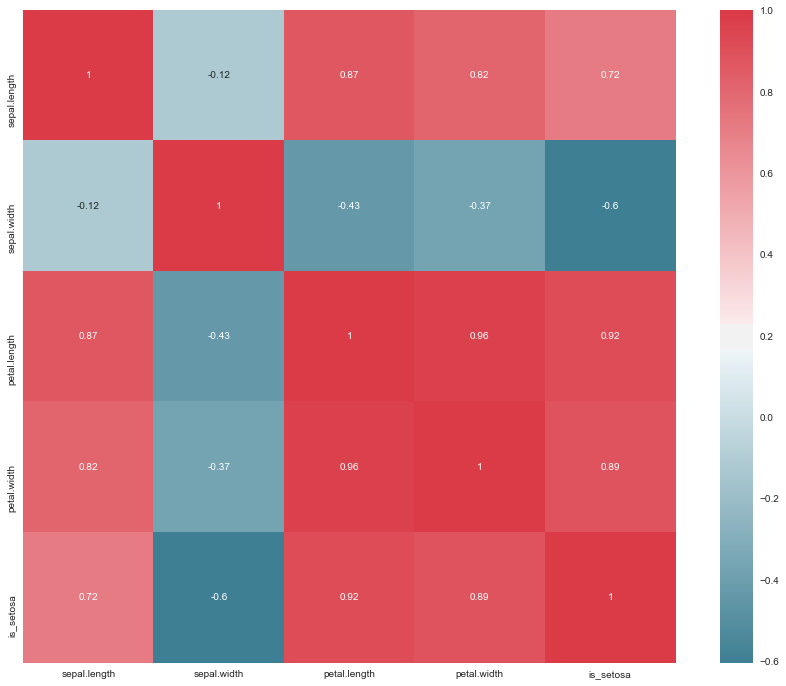

In [245]:
corr = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr, 
    mask=np.zeros_like(corr, dtype=np.bool), 
    cmap=sns.diverging_palette(220, 10, as_cmap=True), 
    square=True,
    annot=True
)
plt.show()

Можно и так:

In [250]:
corr.style.background_gradient(cmap='coolwarm', axis=None)